In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
data = pd.read_csv('DSS2.csv')
data['SIFT'].fillna(value = 'tolerated',inplace =True)

### SELECTING FEATURE and Data Preprocessing



*   **AS_SB_TABLE** Forward and reverse read counts for each allele, with alleles separated by the pipe character
• **DP** Approximate read depth
• **GERMQ**The phred-scaled posterior probability that the alternate allele(s) are not germline variants
**MBQ**Median base quality of each allele
*  **MMQ**Median mapping quality of each allele
• **MPOS** Median distance from the end of the read for each alternate allele
• **TLOD**Log odds that the variant is present in the tumor sample relative to the expected noise
•**POPAF** Population allele frequency of the alternate alleles

In [ ]:
x = data[['VARIANT_CLASS','TLOD','shiftscore', 'Sample.AF', 'SIFT','MBQ', 'MFRL', 'MMQ','Sample.AD', 'Sample.F1R2', 'Sample.F2R1', 'DP', 'GERMQ', 'MPOS',
       'POPAF', 'Sample.DP']]
a = {'SNV':0,'substitution':1,'deletion':2,'insertion':3}
x['VARIANT_CLASS'] = x['VARIANT_CLASS'].map(a)
b = {'deleterious':0, 'tolerated':1, 'deleterious_low_confidence':2,
       'tolerated_low_confidence':3}
x['SIFT'] = x['SIFT'].map(b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
x['cancer'] = data[['cancer']]
x.to_csv('ROC.csv',index = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


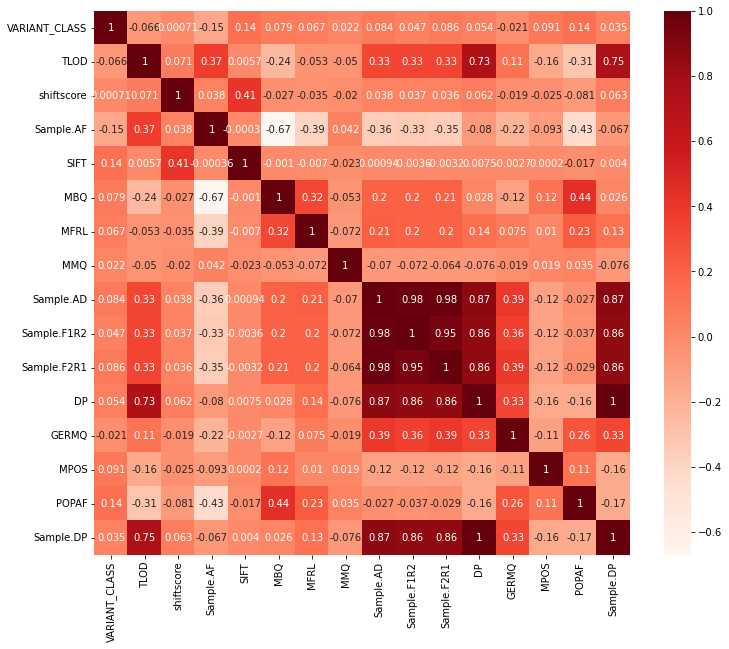

In [ ]:
## correlation heatmap
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# sns.pairplot(x)

In [ ]:
fig = sns.pairplot(x)
fig.savefig('pair plot.svg')

In [ ]:
#save image
fig.savefig('pair plot.svg',dip = 600)

In [ ]:
# train_test and split
y = x[['cancer']] ## target
x = x.drop(['cancer'],axis = 1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train.shape,y_train.shape

((2926, 16), (2926, 1))

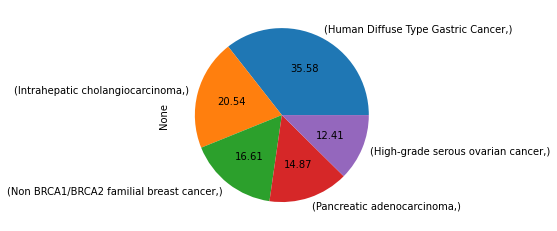

In [ ]:
y_train.value_counts().plot.pie(autopct='%.2f')

#### graph shows the our class of target is imbalnce and it is balanced using oversampling

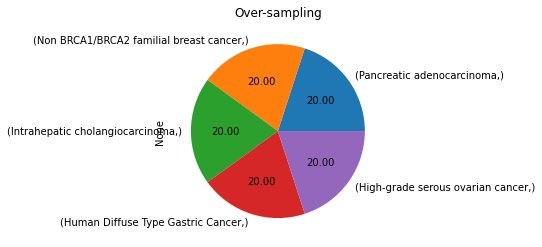

In [ ]:
## OVERSAMPLING
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
y_train_ros = pd.DataFrame(y_train_ros)
ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
# datasets after balanceing class
X_train_ros.shape, y_train_ros.shape

((5205, 16), (5205, 1))

### Decision tree model for imbalance data


In [ ]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)
y_pred1 = classifier.predict(x_test)
print(classification_report(y_test, y_pred1))

                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.76      0.59      0.66       181
     Human Diffuse Type Gastric Cancer       0.84      0.85      0.84       463
       Intrahepatic cholangiocarcinoma       0.81      0.82      0.81       232
Non BRCA1/BRCA2 familial breast cancer       0.88      0.97      0.92       237
             Pancreatic adenocarcinoma       0.65      0.67      0.66       142

                              accuracy                           0.81      1255
                             macro avg       0.79      0.78      0.78      1255
                          weighted avg       0.81      0.81      0.81      1255



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


## Decision tree for imbalanced data

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred))

                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.64      0.50      0.56       181
     Human Diffuse Type Gastric Cancer       0.84      0.80      0.82       463
       Intrahepatic cholangiocarcinoma       0.73      0.80      0.76       232
Non BRCA1/BRCA2 familial breast cancer       0.90      0.91      0.91       237
             Pancreatic adenocarcinoma       0.57      0.71      0.64       142

                              accuracy                           0.77      1255
                             macro avg       0.74      0.74      0.74      1255
                          weighted avg       0.77      0.77      0.77      1255



## Decision tree balanced data

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_ros,y_train_ros)
y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred))

                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.62      0.50      0.55       181
     Human Diffuse Type Gastric Cancer       0.83      0.82      0.83       463
       Intrahepatic cholangiocarcinoma       0.75      0.81      0.78       232
Non BRCA1/BRCA2 familial breast cancer       0.89      0.88      0.88       237
             Pancreatic adenocarcinoma       0.56      0.65      0.60       142

                              accuracy                           0.76      1255
                             macro avg       0.73      0.73      0.73      1255
                          weighted avg       0.76      0.76      0.76      1255



### Ramdom forest for balanced data

In [ ]:
classifier1= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier1.fit(X_train_ros, y_train_ros)
y_pred1 = classifier1.predict(x_test)
print(classification_report(y_test, y_pred1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.72      0.66      0.69       181
     Human Diffuse Type Gastric Cancer       0.90      0.83      0.86       463
       Intrahepatic cholangiocarcinoma       0.79      0.86      0.83       232
Non BRCA1/BRCA2 familial breast cancer       0.89      0.97      0.93       237
             Pancreatic adenocarcinoma       0.66      0.70      0.68       142

                              accuracy                           0.82      1255
                             macro avg       0.79      0.80      0.80      1255
                          weighted avg       0.82      0.82      0.82      1255



### model cross validtion for imbalance data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, x_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
y_test_pred
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series([ 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_cv, mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

,Performance_metric_names,Performance_metric_values
0,MCC_CV,0.779741
1,MCC_test,0.788190


### model cross validataion and test score for balanced data


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_ros, y_train_ros, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_ros)
y_test_pred = model.predict(x_test)
y_test_pred
#mcc_train = matthews_corrcoef(X_train_ros, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series([ 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_cv, mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

,Performance_metric_names,Performance_metric_values
0,MCC_CV,0.935611
1,MCC_test,0.779654


## testing

In [ ]:
# def testing(a):
#   o = [a]
#   x1 = data.loc[data['SampleID'].isin(o)] 
#   test = x1[['VARIANT_CLASS','TLOD','shiftscore', 'Sample.AF', 'SIFT','MBQ', 'MFRL', 'MMQ','Sample.AD', 'Sample.F1R2', 'Sample.F2R1', 'DP', 'GERMQ', 'MPOS',
#             'POPAF', 'Sample.DP']]
#   a1 = {'SNV':0,'substitution':1,'deletion':2,'insertion':3}
#   test['VARIANT_CLASS'] = test['VARIANT_CLASS'].map(a1)
#   b1 = {'deleterious':0, 'tolerated':1, 'deleterious_low_confidence':2,
#             'tolerated_low_confidence':3}
#   test['SIFT'].fillna(value = 'tolerated',inplace =True)
#   test['SIFT'] = test['SIFT'].map(b1)
#   y_pp = model.predict(test)
#   y_pp = pd.DataFrame(y_pp)
#   y_pp.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# a1 = 'SRR941054'
# testing(a1) ## predicted cancer type

In [ ]:
# o = ['SRR941054']
# X = data.loc[data['SampleID'].isin(o)]
# X['cancer'].head(2) ### actual cancer type 

In [ ]:
# a2 = 'SRR900123'
# testing(a2)

In [ ]:
# o = ['SRR900123']
# X = data.loc[data['SampleID'].isin(o)]
# X['cancer'].head(2) ### actual cancer type 

In [ ]:
y_test

,cancer
954,Non BRCA1/BRCA2 familial breast cancer
3685,Human Diffuse Type Gastric Cancer
448,High-grade serous ovarian cancer
2524,Intrahepatic cholangiocarcinoma
1242,Non BRCA1/BRCA2 familial breast cancer
...,...
317,High-grade serous ovarian cancer
2476,Intrahepatic cholangiocarcinoma
851,Non BRCA1/BRCA2 familial breast cancer
3048,Human Diffuse Type Gastric Cancer


In [ ]:
y_test_pred

array(['Non BRCA1/BRCA2 familial breast cancer',
       'Human Diffuse Type Gastric Cancer',
       'Non BRCA1/BRCA2 familial breast cancer', ...,
       'Non BRCA1/BRCA2 familial breast cancer',
       'Human Diffuse Type Gastric Cancer',
       'Intrahepatic cholangiocarcinoma'], dtype=object)